Scraping , Collecte et préparation des données du site https://www.behindthename.com/names/list

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def getGender(name):
    curr_url = "https://www.behindthename.com"+name
    response = requests.get(curr_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        gender = soup.find("span", class_="infoname-info").find("span").text
    return gender



In [3]:
print(getGender("/name/Aaron")) 

Masculine


In [4]:
url = "https://www.behindthename.com/names/usage/french"

#prénom, genre et nombre d'usage
def getNameInfos(url, usg_OK):
    infos = []
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        for i in soup.find_all("div", class_="browsename"):
            prenom = i.find("span", class_="listname").find("a").text
            
            '''curr_href = i.find("a", href=True)['href']
            genre = getGender(curr_href) #compilation trop longues, c'était pour tester en ayant plus de précision sur le genre'''
            
            tmp = i.find("span", class_="listgender").find_all("span")
            genre = tmp[0].text if len(tmp) <= 1 else ','.join(list(map(lambda x: x.text, tmp)))
            
            usg = len(i.find("span", class_="listusage").find_all("a", class_="usg"))
            infos.append({'Prenom': prenom, 'Genre': genre, 'Usage': usg}) if usg_OK else infos.append({'Prenom': prenom, 'Genre': genre})
        df_infos = pd.DataFrame(infos)
    return df_infos

df_french_names = getNameInfos(url, True)
df_french_names

,Prenom,Genre,Usage
0,Aaron,m,8
1,Abel,m,10
2,Abigaëlle,f,1
3,Abraham,m,11
4,Achille,m,2
...,...,...,...
295,Émeline,f,1
296,Émeric,m,1
297,Émile,m,1
298,Émilie,f,1


In [5]:
df_french_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Prenom  300 non-null    object
 1   Genre   300 non-null    object
 2   Usage   300 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [6]:
df_french_names.describe()

,Usage
count,300.000000
mean,2.496667
std,3.429655
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,25.000000


In [7]:
print(df_french_names[df_french_names["Prenom"] == "Alexis"])

    Prenom Genre  Usage
37  Alexis   m,f      5


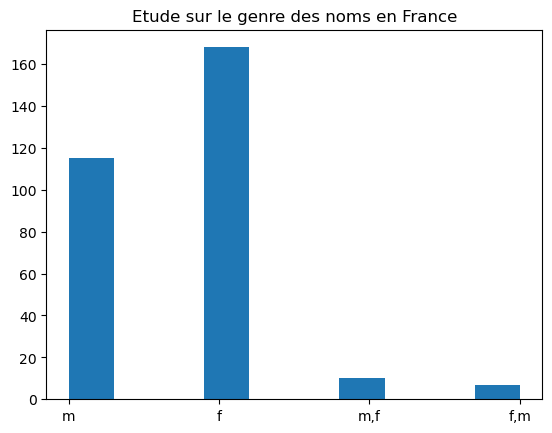

In [8]:
plt.title("Etude sur le genre des noms en France")
plt.hist(df_french_names["Genre"])
plt.show()

On observe qu'il y a plus de nom féminin en France que masculin.

In [9]:
def countNbPages(url):
    response = requests.get(url)
    nbPages = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        for i in soup.find("nav", class_="pagination").find_all("a"):
            if i.has_attr("class"):
                nbPages.append(i)
    return len(nbPages)+1

print(countNbPages(url)) #test

4


In [10]:
def getCategories(url):
    categories = []
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        for i in soup.find("ul", class_="columnedlist meaningindexlist indexspacer").find_all("li"):
            category = i.find("a", href=True).text
            link = i.find("a", href=True)['href']
            categories.append({'Categorie': category, 'URL': url.replace("/meanings/", "")+link})
        df_categories = pd.DataFrame(categories)
    return df_categories

url = "https://www.behindthename.com/meanings/"
df_categories = getCategories(url)
print(df_categories)

         Categorie                                                URL
0           strong       https://www.behindthename.com/meaning/strong
1            brave        https://www.behindthename.com/meaning/brave
2      intelligent  https://www.behindthename.com/meaning/intelligent
3            happy        https://www.behindthename.com/meaning/happy
4        beautiful    https://www.behindthename.com/meaning/beautiful
5        fortunate    https://www.behindthename.com/meaning/fortunate
6         generous     https://www.behindthename.com/meaning/generous
7            quick        https://www.behindthename.com/meaning/quick
8         graceful     https://www.behindthename.com/meaning/graceful
9             love       https://www.behindthename.com/meaning/love-1
10             war  https://www.behindthename.com/meaning/military...
11         weather      https://www.behindthename.com/meaning/weather
12   king or queen      https://www.behindthename.com/meaning/monarch
13  god or goddess  

In [11]:
def getInfosFromCat(url):
    infos = []
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        for i in soup.find_all("div", class_="mng-results"):
            splitStr = i.text.split("\n")
            for j in splitStr:
                subSplit = j.split("\xa0")
                if(len(subSplit) == 3):
                    prenom = subSplit[0]
                    genre = subSplit[1].strip("()")
                elif(len(subSplit) == 4):
                    prenom = subSplit[0]
                    genre = subSplit[2].strip("()")
                infos.append({'Prenom': prenom, 'Genre': genre})
    df_infos = pd.DataFrame(infos)
    return df_infos

for i in df_categories.sample(n=3)["URL"]:
    currDf = getInfosFromCat(i)
    print("***********************",i,"***********************")
    print(currDf.head(), "\nDimension :",currDf.shape, "\n")
        

*********************** https://www.behindthename.com/meaning/grey ***********************
    Prenom Genre
0  Argyros     m
1      Eun   m,f
2    Fidda     f
3    Floyd     m
4     Gray   m,f 
Dimension : (289, 2) 

*********************** https://www.behindthename.com/meaning/green ***********************
   Prenom Genre
0     Aoi   f,m
1  Blerta     f
2  Midori     f
3  Ntsuab     f
4    Qing   f,m 
Dimension : (294, 2) 

*********************** https://www.behindthename.com/meaning/graceful ***********************
     Prenom Genre
0      Juan     f
1       Lan   f,m
2  Lilavati     f
3   Malkhaz     m
4        Na     f 
Dimension : (718, 2) 

